In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense

In [29]:
data_RMS = pd.read_csv('RMS_data_ASI3.txt', sep=" ", header=None)
data_RMS.columns = ["Time", "Vibrations RMS", "Accel RMS"]
test = np.savetxt( 'data', data_RMS[["Time", "Vibrations RMS"]].to_numpy())

In [3]:
data_z = pd.read_csv('z_data_ASI3.txt', sep=" ", header=None)
data_z.columns = ["Time", "Vibrations Z", "Accel Z"]

In [4]:
data_xy = pd.read_csv('xy_data_ASI3.txt', sep=" ", header=None)
data_xy.columns = ["Time", "Vibrations XY", "Accel XY"]

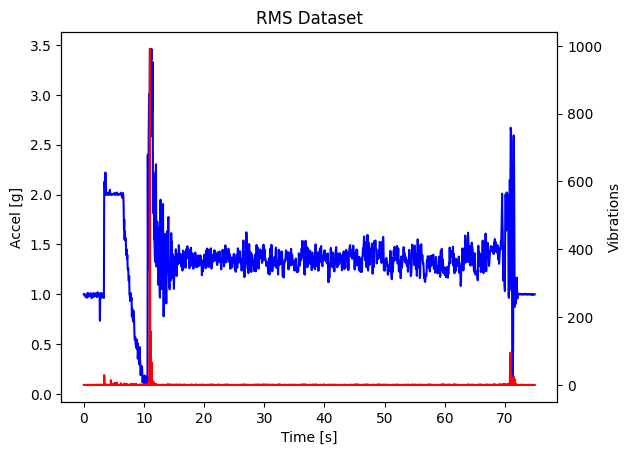

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')
ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset')
plt.show()

# =========== RMS Data Labelling ================

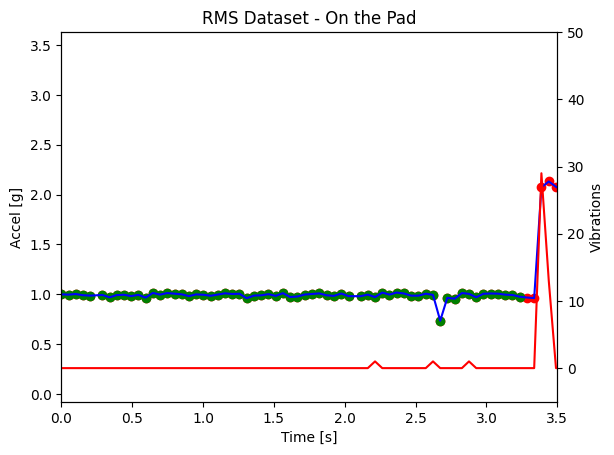

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

pad = data_RMS[ data_RMS["Time"] <= 3.25 ]
ax1.scatter(pad["Time"], pad["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - On the Pad')
plt.xlim(0,3.5)
plt.ylim(-5, 50)
plt.show()

In [7]:
clas = []
pad.index
print(pad.index)
for i in pad.index:
    clas.append(0)   # 0 = on Pad


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62],
      dtype='int64')


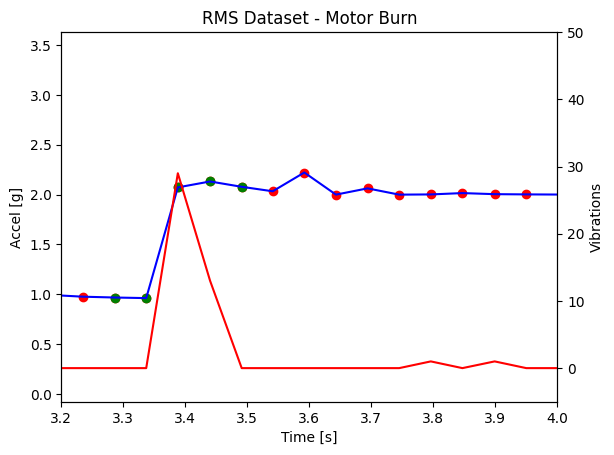

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

launch = data_RMS[(data_RMS["Time"] > 3.25) & (data_RMS["Time"] < 3.5 )]
ax1.scatter(launch["Time"], launch["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(3.2, 4)
plt.ylim(-5, 50)
plt.show()

for i in launch.index:
    clas.append(1)   # 1 = ignition


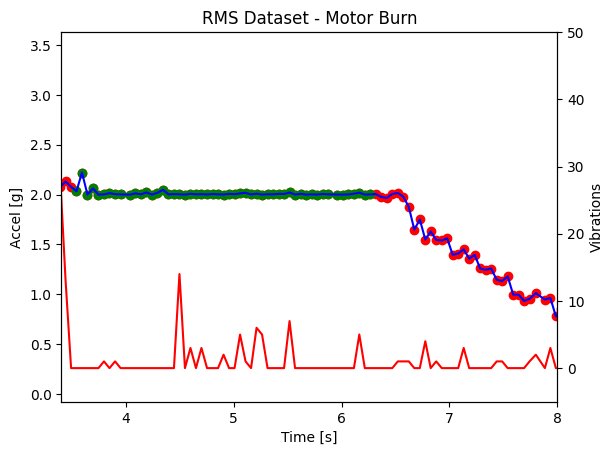

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

burn = data_RMS[(data_RMS["Time"] > 3.5) & (data_RMS["Time"] < 6.3 )]
ax1.scatter(burn["Time"], burn["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(3.4, 8)
plt.ylim(-5, 50)
plt.show()

for i in burn.index:
    clas.append(2)  # 2 = motor burn


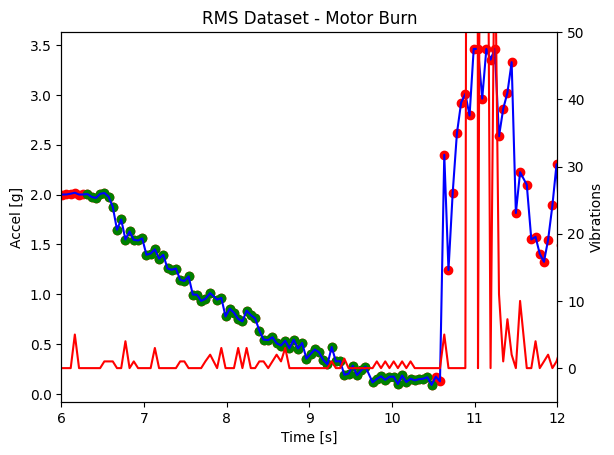

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

stop = data_RMS[(data_RMS["Time"] > 6.3) & (data_RMS["Time"] <  10.5)]
ax1.scatter(stop["Time"], stop["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(6, 12)
plt.ylim(-5, 50)
plt.show()

for i in stop.index:
    clas.append(3)   # 3 = motor stop


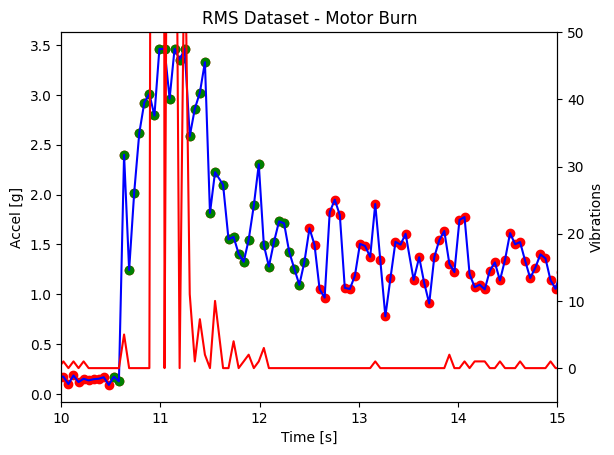

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

fall = data_RMS[(data_RMS["Time"] > 10.5) & (data_RMS["Time"] <  12.5)]
ax1.scatter(fall["Time"], fall["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(10, 15)
plt.ylim(-5, 50)
plt.show()

for i in fall.index:
    clas.append(4)    # 4 = ejection


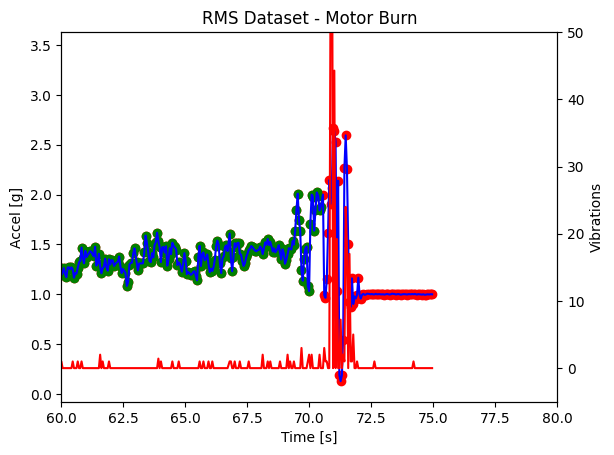

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

falling = data_RMS[(data_RMS["Time"] > 12.5) & (data_RMS["Time"] <  70.5)]
ax1.scatter(falling["Time"], falling["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(60, 80)
plt.ylim(-5, 50)
plt.show()


for i in falling.index:
    clas.append(5)   # 5 = Landing 


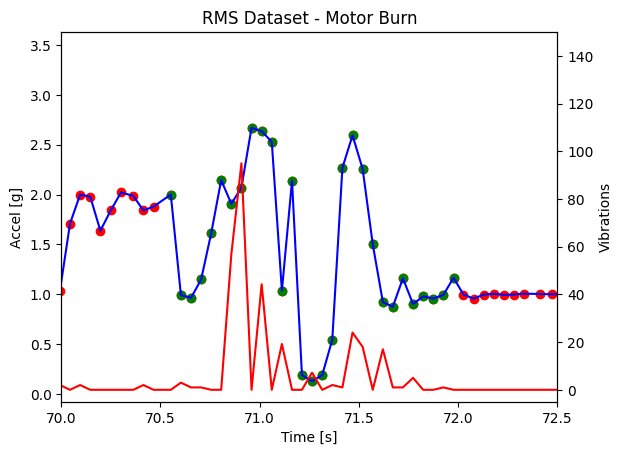

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_RMS["Time"], data_RMS["Accel RMS"], color='blue')
ax1.scatter(data_RMS["Time"], data_RMS["Accel RMS"], color='red')
ax2.plot(data_RMS["Time"], data_RMS["Vibrations RMS"], color='red')

landling = data_RMS[(data_RMS["Time"] > 70.5) & (data_RMS["Time"] <  72)]
ax1.scatter(landling["Time"], landling["Accel RMS"], color='green')

ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('RMS Dataset - Motor Burn')
plt.xlim(70, 72.5)
plt.ylim(-5, 150)
plt.show()

for i in landling.index:
    clas.append(6)     # 6 = Landing


In [14]:
landed = data_RMS[(data_RMS["Time"] > 72)]
for i in landed.index:
    clas.append(7)        # 7 = Landed

In [15]:
data_RMS.insert( 0, "Class", clas)

In [16]:
print(data_RMS)
print(data_RMS[["Class", "Time", "Vibrations RMS"]])

      Class    Time  Vibrations RMS  Accel RMS
0         0   0.000             0.0   0.998434
1         0   0.051             0.0   0.995293
2         0   0.101             0.0   1.001655
3         0   0.152             0.0   0.990042
4         0   0.203             0.0   0.985432
...     ...     ...             ...        ...
1436      7  74.749             0.0   0.998508
1437      7  74.800             0.0   0.998365
1438      7  74.851             0.0   0.997349
1439      7  74.902             0.0   0.999913
1440      7  74.953             0.0   0.998813

[1441 rows x 4 columns]
      Class    Time  Vibrations RMS
0         0   0.000             0.0
1         0   0.051             0.0
2         0   0.101             0.0
3         0   0.152             0.0
4         0   0.203             0.0
...     ...     ...             ...
1436      7  74.749             0.0
1437      7  74.800             0.0
1438      7  74.851             0.0
1439      7  74.902             0.0
1440      7  74

In [23]:
def create_windows_from_df(df, window_size, stride):
    X, y = [], []
    data = df.to_numpy()
    
    for i in range(0, len(data) - window_size + 1, stride):
        window = data[i:i + window_size]
        
        # Features: Time, Vibrations RMS, Accel RMS
        features = window[:, 1:3]
        
        # Label: from last point in the window ( good for sequential predictions? )
        # for majority/average in window => label = np.bincount(window[:, 0].astype(int)).argmax()
        label = window[-1, 0]
        
        X.append(features)
        y.append(label)
    
    return np.array(X), np.array(y)

In [25]:
windows, labels = create_windows_from_df( data_RMS[["Class", "Time", "Vibrations RMS"]], 3, 1 )  # "Class " removed
print( windows.shape )
print( labels.shape )
# inner dim should equal == 1 label per window 
#print(windows)
#print(labels)

(1439, 3, 2)
(1439,)


In [26]:
np.save('Model_store/windows.npy', windows)
np.save('Model_store/labels.npy', labels)

## Z Axis DataSet

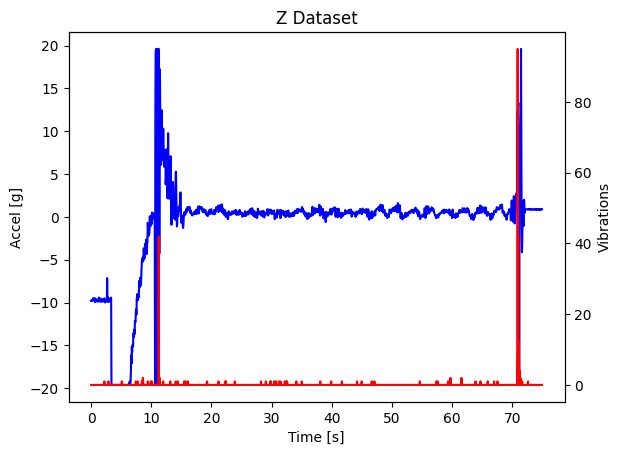

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_z["Time"], data_z["Accel Z"], color='blue')
ax2.plot(data_RMS["Time"], data_z["Vibrations Z"], color='red')
ax1.set_ylabel('Accel [g]')
ax2.set_ylabel('Vibrations')
ax1.set_xlabel('Time [s]')
plt.title('Z Dataset')
plt.show()